In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2

In [2]:
def gray_check(im):
    im[im<0]=0
    return im

def mouse_event(event, x, y, flags, param):
    if pt[0] > (data_num-1):
        return
    if event == cv2.EVENT_LBUTTONUP:
        points[0][pt[0]] = [x,y]
        cv2.circle(img, (x,y), 5, (0,255,0), -1)
        pt[0] += 1
        
def edge_injection(img):
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    grad = np.sqrt(dx ** 2 + dy ** 2)
    return grad

def to_binary(ori_img,th=20):
    if len(ori_img.shape)==3:
        raise Exception("グレースケールにしてください")
    new_img=np.copy(ori_img)
    
    new_img[new_img[:,:]<th]=0
    new_img[new_img[:,:]>=th]=100
    return new_img

def cut(ori_img,cut_c="r",cut_val=100):
    new_img=np.copy(ori_img)
    if cut_c=="r":
        new_img[new_img[:,:,0]<cut_val]=[0,0,0]
    if cut_c=="g":
        new_img[new_img[:,:,1]<cut_val]=[0,0,0]
    if cut_c=="b":
        new_img[new_img[:,:,2]<cut_val]=[0,0,0]
    if cut_c=="bl":
        new_img[new_img[:,:]<cut_val]=0
    return new_img

def show(t_img,gray=False):
    fig = plt.figure(figsize=(6,6),dpi=200)
    plt.imshow(t_img)
    if gray!=False:
        plt.gray()
    plt.show()

def load(img_path,flag=1):
    img=cv2.imread(img_path)
    if flag==1:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def measure_s(img,c="r",th=200):
    threshold=th
    mu_scale=50/200
    if c=="r":
        s=np.count_nonzero([img[:,:,0]>threshold])
    elif c=="g":
        s=np.count_nonzero([img[:,:,1]>threshold])
    elif c=="b":
        s=np.count_nonzero([img[:,:,2]>threshold])
    elif c=="bl":
        #グレースケール画像に対しては閾値の設定をしなければならない。
        if threshold>100:
            raise Exception("Error 閾値")
        s=np.count_nonzero([img[:,:]>threshold])
    print("マスクエリア:対応カラー{}ピクセル".format(s))
    print("マスクエリア：µ変換:{}µ㎡".format(s*mu_scale**2))


In [3]:
mit_path="E:bio/1117/3-cont-x40-1-04.tif"
he_path="E:bio/1117/3-cont-x40-1-02.tif"

True


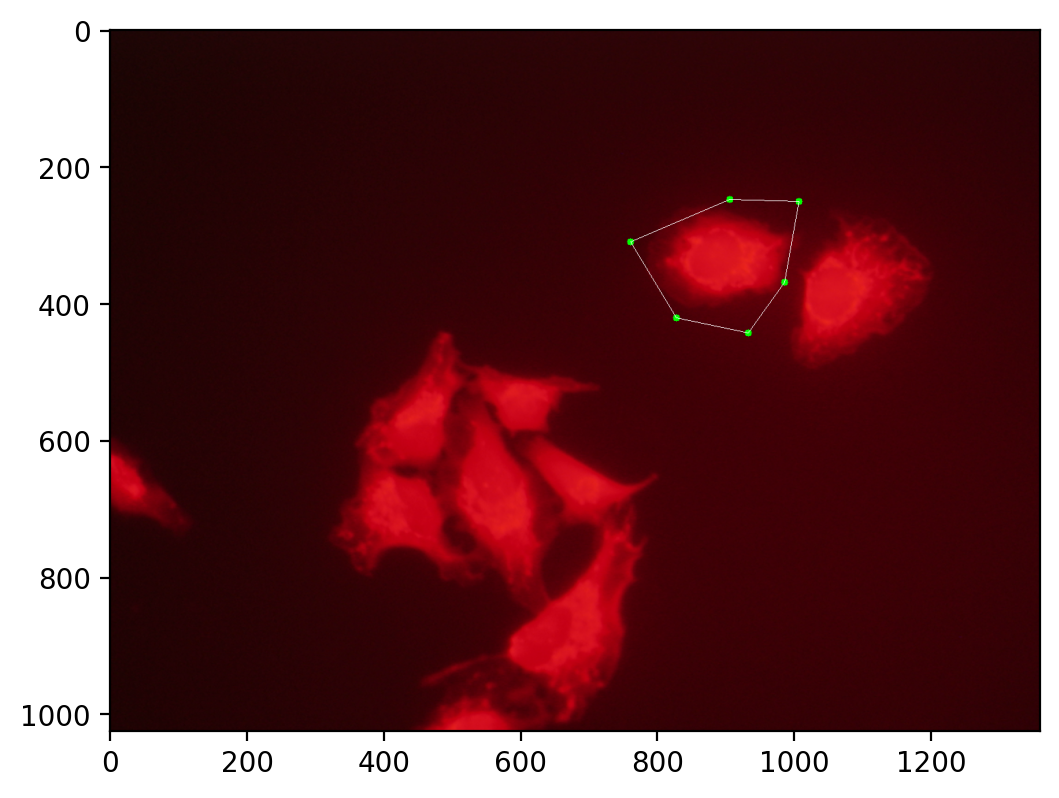

In [4]:
data_num = 20

points = np.zeros([2,data_num,2],dtype = int)
pt = np.array([0,0])

img=load(mit_path)
img2=np.copy(img)
cv2.namedWindow("窓", cv2.WINDOW_KEEPRATIO)

cv2.setMouseCallback("窓", mouse_event)

print(np.any(points[0][1]==[0]))

flag=1
while True:
    cv2.imshow("窓", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()
real_points=[]
for i,j in enumerate(points[0]):
    if np.any(j!=[0,0]):
        real_points.append(tuple(j))
real_points=np.array(tuple(real_points))
cv2.polylines(img, [real_points], True, (255, 255, 255))

show(img)

In [5]:
gray_img=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

mask_img=np.zeros_like(gray_img)

mask_img=cv2.fillConvexPoly(mask_img, real_points, (255, 255, 255))
potial_img=(mask_img/255)*gray_img
dis_img=cut(potial_img,cut_c="bl",cut_val=60)#cut_val=60適正ライン

binary_mit_img=to_binary(dis_img)

he_img= cv2.imread(he_path)
he_img=cv2.cvtColor(he_img,cv2.COLOR_BGR2GRAY)
potial_he_img=(mask_img/255)*he_img
dis_he_img=cut(potial_he_img,cut_c="bl",cut_val=60)#cut_val=60適正ライン

binary_he_img=to_binary(dis_he_img)


marge_binary_img=gray_check(binary_mit_img-binary_he_img)

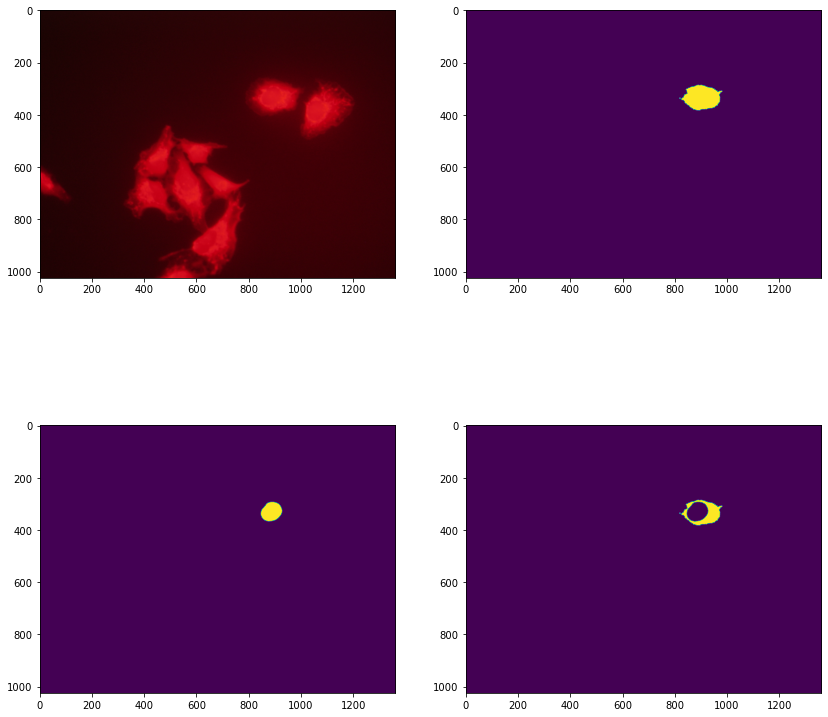

マスクエリア:対応カラー5936ピクセル
マスクエリア：µ変換:371.0µ㎡


In [6]:
fig,ax=plt.subplots(2,2,figsize=(14,14))
arr=list([img2,binary_mit_img,binary_he_img,marge_binary_img])
arr=arr[::-1]
for i in range(2):
    for k in range(2):
        ax[i][k].imshow(arr.pop())
plt.show()

measure_s(marge_binary_img,c="bl",th=50)